In [16]:
from dask import delayed
import copy

class Component(object):
    def __init__(self, i):
        self.i = i
        
    def __iadd__(self, other):
        self.i += other.i
        return self
       
DComp = delayed(Component)

clist = [DComp(i) for i in range(10)]

In [17]:
clist

[Delayed('Component-09d1cae0-098e-46b7-bcc6-aeeaf0cdda45'),
 Delayed('Component-de7cfe9b-3293-4f47-a872-54e98fb3eb3b'),
 Delayed('Component-5a6223a7-66fd-4cbc-9c42-a6eb5569eb6b'),
 Delayed('Component-642370e2-159e-4056-826d-1ca26bd4b472'),
 Delayed('Component-d1bcc31c-6666-411c-af07-e10df6f4b0ba'),
 Delayed('Component-1418c54a-2dff-4770-a1cd-827aec3b3076'),
 Delayed('Component-f457947a-07f0-41dd-8267-19c826ade91f'),
 Delayed('Component-2d9c2ae0-2545-4c9f-b567-dd96601214c2'),
 Delayed('Component-557b7d35-4899-4932-bedf-2e3a8de50926'),
 Delayed('Component-73f6a43a-3b45-4dfb-8100-5d90d3798d3e')]

Note that the attributes of the delayed objects do exist, and are delayed: 

In [18]:
for c in clist: 
    print(c.i)

Delayed('getattr-3f1207b5eeceb4dab2eabbb23c42b2e4')
Delayed('getattr-a3fe67ec0309f5c3f4806e7a513c4f57')
Delayed('getattr-c7e72440aa1b4eff4bf2ef922c6b4f1b')
Delayed('getattr-a1ff1922d26ea8dbabd2a6e3a212082c')
Delayed('getattr-9d3993b32d75870baef255ac64f0f8bd')
Delayed('getattr-c959a7fadcbdeae9d11d3b1bd9b32d9a')
Delayed('getattr-5ed918e8c7d3e3994f40d37a1723e7f9')
Delayed('getattr-16d986109175d825d0f3a4e1e6e62e52')
Delayed('getattr-4cc0472bc56a0308375cadb0b60c5110')
Delayed('getattr-ae655e31bbdf924d41271d7ddaf3153a')


And if we add a delayed to an integer, it works, but the integer becomes delayed: 

In [19]:
x = 1
x += clist[0].i
x

Delayed('_inner-d83dd8711d444c88c4ec951de9e98903')

In [20]:
import copy
def merge(comps):
    '''merging components (summing i)'''
    # c is obviously a component
    c = Component(0)
    for comp in comps: 
        print('adding', c, comp)
        # comp is a delayed.
        c += comp
        # see the implementation of Component.__iadd__
        # c stays a component, but c.i becomes a delayed
        print(c.i)
    return c

In [21]:
# does not work because c is a component, not a delayed. 
# our functions must be made in such a way that they can deal with delays. 
m1 = merge(clist)
m1.visualize()

('adding', <__main__.Component object at 0x7f83cadbfad0>, Delayed('Component-09d1cae0-098e-46b7-bcc6-aeeaf0cdda45'))
Delayed('_inner-e25da05796fe1ba9a72526c5f4475a8f')
('adding', <__main__.Component object at 0x7f83cadbfad0>, Delayed('Component-de7cfe9b-3293-4f47-a872-54e98fb3eb3b'))
Delayed('add-d66018ec877ab78f94f07c6f6322774c')
('adding', <__main__.Component object at 0x7f83cadbfad0>, Delayed('Component-5a6223a7-66fd-4cbc-9c42-a6eb5569eb6b'))
Delayed('add-31b5b0ee4e15bc75a946f71b4de0f74e')
('adding', <__main__.Component object at 0x7f83cadbfad0>, Delayed('Component-642370e2-159e-4056-826d-1ca26bd4b472'))
Delayed('add-7f337ce0ff108b81ab90a8e80cb442c9')
('adding', <__main__.Component object at 0x7f83cadbfad0>, Delayed('Component-d1bcc31c-6666-411c-af07-e10df6f4b0ba'))
Delayed('add-0c2c3d9cbff1001327365d80951c17c3')
('adding', <__main__.Component object at 0x7f83cadbfad0>, Delayed('Component-1418c54a-2dff-4770-a1cd-827aec3b3076'))
Delayed('add-efb133ed6f431504a9537e5ce1b6a588')
('addin

AttributeError: 'Component' object has no attribute 'visualize'

Let's cure this problem. 

('adding', Delayed('Component-09d1cae0-098e-46b7-bcc6-aeeaf0cdda45'), Delayed('Component-de7cfe9b-3293-4f47-a872-54e98fb3eb3b'))
('adding', Delayed('add-5864a7fbb537591d6859b25961f3a608'), Delayed('Component-5a6223a7-66fd-4cbc-9c42-a6eb5569eb6b'))
('adding', Delayed('add-e8b142b53a14541d82433bb6b8a81150'), Delayed('Component-642370e2-159e-4056-826d-1ca26bd4b472'))
('adding', Delayed('add-d517b3f72ed851ee2055227f307e9fb3'), Delayed('Component-d1bcc31c-6666-411c-af07-e10df6f4b0ba'))
('adding', Delayed('add-4316da2048b160a9c39eeaa31411789d'), Delayed('Component-1418c54a-2dff-4770-a1cd-827aec3b3076'))
('adding', Delayed('add-7fa39e82e2aaad1bca44a9d57ef60f45'), Delayed('Component-f457947a-07f0-41dd-8267-19c826ade91f'))
('adding', Delayed('add-d48a64fe8fc30189abb8018899d21a37'), Delayed('Component-2d9c2ae0-2545-4c9f-b567-dd96601214c2'))
('adding', Delayed('add-e270bd7395288bd9fedc7170d521f8b3'), Delayed('Component-557b7d35-4899-4932-bedf-2e3a8de50926'))
('adding', Delayed('add-b896653dfde88c

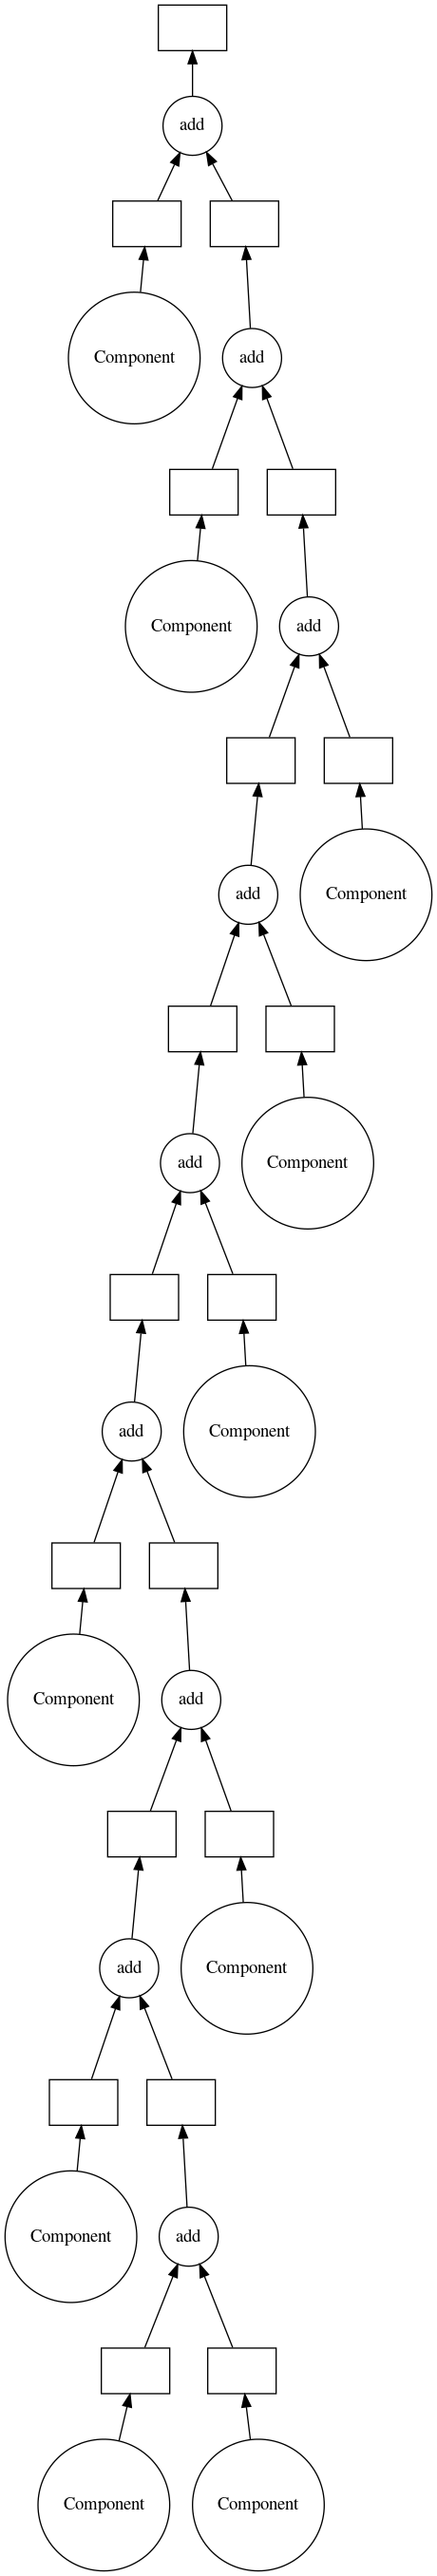

In [22]:
import copy
def merge2(comps):
    # now c is a delayed, since it's a copy of a delayed
    c = copy.copy(comps[0])
    for comp in comps[1:]:
        print('adding', c, comp)
        # so these operations between delayed objects are 
        # recorded by dask
        c+=comp
    return c

m2 = merge2(clist)
# indeed, no need to delay merge2. 
# but the parallelization is done as the iteration goes, hence the vertical structure
m2.visualize()

In [23]:
m2 = m2.compute()
m2.i

TypeError: unsupported operand type(s) for +: 'Component' and 'Component'

The previous command fails. Why? the error message tells us that the + operator does not exist for the Component class. And indeed, we have implemented a += operator (__iadd__), not a + operator. 
Also, looking at the graph, it seems that dask replaces the += operation by an add operation. 

Let's try and add a delayed on merge2 : 

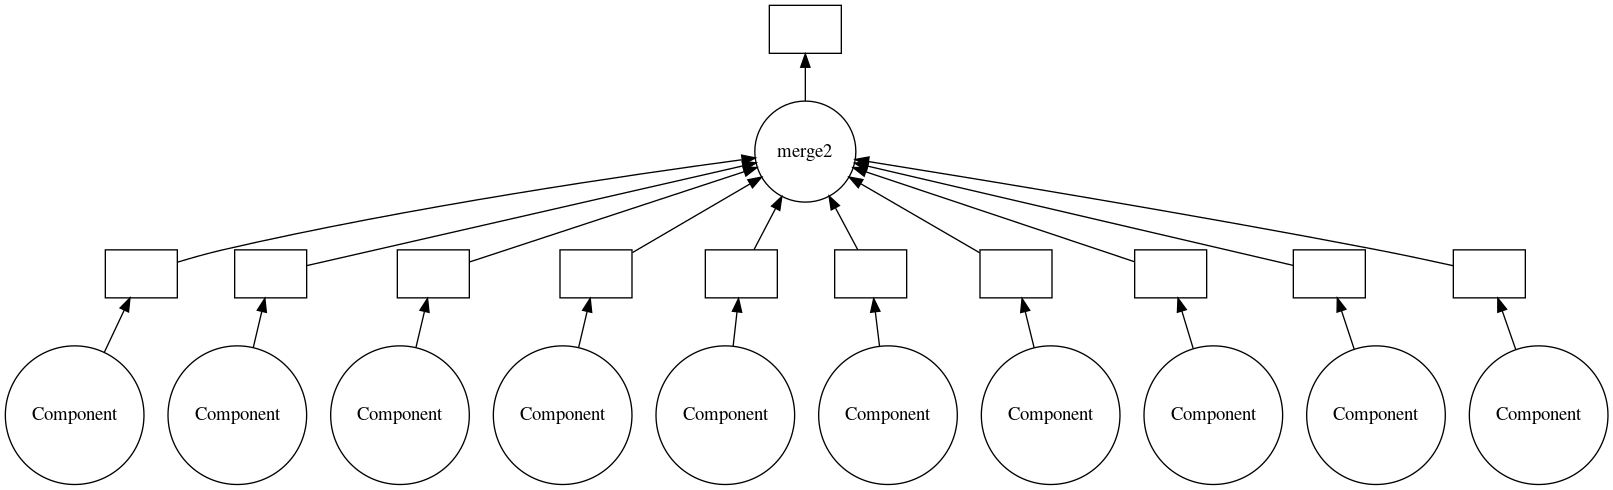

In [24]:
m3 = delayed(merge2)(clist)
m3.visualize()

In [25]:
m3 = m3.compute()
m3.i

('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83e082f210>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83cad84510>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83cad84050>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83cadbfc90>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83cadbf150>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83caea9850>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83cadbfa90>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83cad84750>)
('adding', <__main__.Component object at 0x7f83caea94d0>, <__main__.Component object at 0x7f83cadbf5d0>)


45

Wow! now this works?? The explanation is simple. merge2 is delayed, so it will be executed after all components have been computed. So at this stage, merge2 does not work on delayed objects, but on components, and so it works. 

Another way to solve the problem without delaying merge2 is to add the required add operator to our component class: 

In [26]:
class Component(object):
    def __init__(self, i):
        self.i = i
        
    def __add__(self, other):
        new = Component(self.i+other.i)
        return new
       
DComp = delayed(Component)

clist = [DComp(i) for i in range(10)]
m2 = merge2(clist)
m2 = m2.compute()
m2.i

('adding', Delayed('Component-6cf32531-8c1d-4bf6-9d57-cb459e69a398'), Delayed('Component-86fcfd71-975c-440d-9d6a-c74d8cf20abd'))
('adding', Delayed('add-a2ea0cfc0aa8c22997044c76d903b918'), Delayed('Component-8798974f-8ec5-42f2-9427-49172c83787b'))
('adding', Delayed('add-727f428389c97f3f27368c27ef93e899'), Delayed('Component-997cd27c-e1d3-40fe-9b3b-60fe235c4f34'))
('adding', Delayed('add-3d3d1c85d277636e211ce4c36c5ee58f'), Delayed('Component-d2608a51-3743-49d3-84a4-4ab6433bc56f'))
('adding', Delayed('add-42bf0e54633273178c80c701b95137e3'), Delayed('Component-63713a82-8453-48c4-b692-b692f5d184be'))
('adding', Delayed('add-a14886f6b9bab86bc57c155eee6a94ae'), Delayed('Component-c559913c-b218-4a75-9af4-7287fe6b06a5'))
('adding', Delayed('add-a8a944d56a1472f4a7f8e913f41f5600'), Delayed('Component-1071d6f1-4906-4f8e-9a54-065b6468263b'))
('adding', Delayed('add-f95cc2f976d41dcb92792b8b88402b76'), Delayed('Component-56688d47-9ceb-444e-8903-2dc38ba5c6bf'))
('adding', Delayed('add-21cc8eea1a591b

45

This time, merge2 is acting on delayed objects, so the output of merge2 is a delayed. 